# Exolore MS-COCO database

## Download dataset

download dataset (coco_val2017) file and unzip

In [ ]:
# download dataset
! sh download_coco_val2017.sh

sh: download_coco_val2017.sh: No such file or directory


## Import Packages

Require coco api for python, `pycocotools` library

In [ ]:
# install coco api
#! conda install pycocotools
# ! pip install pycocotools

In [2]:
import sys; sys.path.insert(0, '..') # add parent folder path where util is
import os
from PIL import Image
from typing import List

from dataset import MyCocoDetection
from util.data import coco_info, rand_split

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from pycocotools.coco import COCO

## Caption

## Segmentation

MASK API https://cocodataset.org/#download

Detection demo: https://github.com/cocodataset/cocoapi/blob/master/PythonAPI/pycocoDemo.ipynb

In [16]:
# require coco_val2017
data_root = '../data'
dataType = 'val2017'
image_dir = f'{data_root}/coco/val2017/'
ann_file = f'{data_root}/coco/ann_trainval2017/instances_{dataType}.json'  # instances_val2017.json


In [17]:
# initialize COCO api for instance annotations
coco=COCO(ann_file)
ids = list(sorted(coco.imgs.keys()))

# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms = [cat['name'] for cat in cats]
print('-'*40)
print('COCO categories: \n{}'.format(' '.join(nms)))
print('-'*40)
nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

loading annotations into memory...
Done (t=0.42s)
creating index...
index created!
----------------------------------------
COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush
----------------------------------------
COCO supercategories: 
person indoor appliance sports accessory vehicle kitchen electronic animal food furniture outdoor


In [41]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person','dog', 'skateboard'])
imgIds = coco.getImgIds(catIds=catIds)
imgs = coco.loadImgs(imgIds)

coco_img = imgs[0]
print(f'How many images including dog, person, and skateboard?: {len(imgIds)}')
print(f'The coco info for the first images') 
coco_img

How many images including dog, person, and skateboard?: 3
The coco info for the first images


{'license': 2,
 'file_name': '000000549220.jpg',
 'coco_url': 'http://images.cocodataset.org/val2017/000000549220.jpg',
 'height': 640,
 'width': 480,
 'date_captured': '2013-11-18 11:01:23',
 'flickr_url': 'http://farm4.staticflickr.com/3145/2419498650_fdfe34eb93_z.jpg',
 'id': 549220}

In [42]:
# def show_segment(coco_img):
#     # load and display image
#     # I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
#     img_file = image_dir + coco_img['file_name']
#     img_raw = Image.open(img_file)

#     # plt.axis('off')
#     # plt.imshow(img_raw)
#     # plt.show()

#     # load and display instance annotations
#     plt.imshow(img_raw)
#     plt.axis('off')
#     annIds = coco.getAnnIds(imgIds=coco_img['id'], catIds=catIds, iscrowd=None)
#     anns = coco.loadAnns(annIds)
#     coco.showAnns(anns)

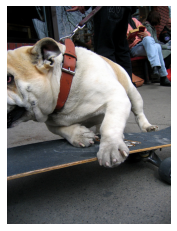

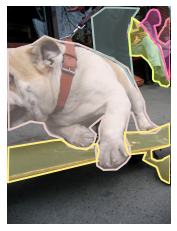

In [103]:
# def show_segment(coco_img):
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
img_file = image_dir + coco_img['file_name']
img_raw = Image.open(img_file)

plt.axis('off')
plt.imshow(img_raw)
plt.show()

# load and display instance annotations
plt.imshow(img_raw)
plt.axis('off')
annIds = coco.getAnnIds(imgIds=coco_img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [101]:
'''
annotation{
    "id": int, 
    "image_id": int, 
    "category_id": int, 
    "segmentation": RLE or [polygon], 
    "area": float, 
    "bbox": [x,y,width,height], 
    "iscrowd": 0 or 1,
}

categories[{
    "id": int, 
    "name": str, 
    "supercategory": str,
}]
'''
len(anns), anns[0].keys()

(6,
 dict_keys(['segmentation', 'area', 'iscrowd', 'image_id', 'bbox', 'category_id', 'id']))

In [51]:
import torch
from torchvision.ops import box_area

import pandas as pd

In [52]:
# first segment of the god image
n_segment = len(anns)
ann = anns[0] 
print(f'number of segmentation: {n_segment}\nOne annotation dict:\n{ann.keys()}')

number of segmentation: 6
One annotation dict:
dict_keys(['segmentation', 'area', 'iscrowd', 'image_id', 'bbox', 'category_id', 'id'])


In [130]:
nparray = np.empty(shape=(0, *coco.annToMask(ann=anns[0]).shape))
nparray.shape

(0, 640, 480)

In [135]:
nparray = np.empty(shape=(0, *coco.annToMask(ann=anns[0]).shape))

for i, ann in enumerate(anns):
    m = coco.annToMask(ann=anns[i])
    print(m.shape)
    if nparray is None:
        nparray = m
    else:
        nparray = np.append(nparray, [m], axis=0)
    
torch.as_tensor(nparray)

(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)


tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 

In [66]:
def show_segments(anns):
    fig, axs = plt.subplots(ncols=len(anns), figsize=(20,4))
    for i, ann in enumerate(anns):
        mask = coco.annToMask(ann)
        axs[i].imshow(mask)  # cmap='gray'
        axs[i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
    
    fig.suptitle('Segmentations')
    plt.show()

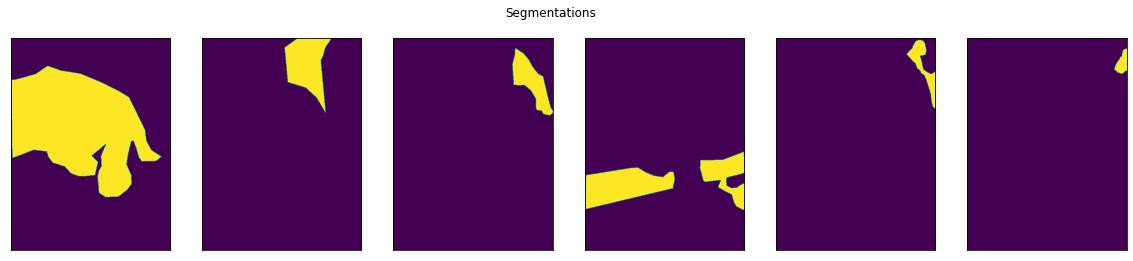

In [67]:
show_segments(anns)

In [62]:
boxes = []
for i in range(len(anns)):
    xmin = anns[i]['bbox'][0]
    ymin = anns[i]['bbox'][1]
    xmax = xmin + anns[i]['bbox'][2]
    ymax = ymin + anns[i]['bbox'][3]
    box = [xmin, ymin, xmax, ymax]
    boxes.append(box)
    
box_area(torch.as_tensor(boxes))
seg_area = ann['area']
box_areas = box_area(torch.as_tensor([[xmin, ymin, xmax, ymax]]))
print(f'segmentation area: {seg_area}, box area: {box_areas}')
print(f'Box: In coco format, bbox = [xmin, ymin, width, height]')
boxes

segmentation area: 104988.31994999998, box area: tensor([2905.8286])
box: In coco format, bbox = [xmin, ymin, width, height]


[[0.0, 86.63, 451.23, 480.96999999999997],
 [248.05, 2.87, 387.84000000000003, 229.0],
 [358.11, 33.08, 480.0, 235.87],
 [1.44, 344.5, 480.0, 520.36],
 [391.61, 8.66, 480.0, 217.63],
 [441.71, 35.48, 480.0, 111.37]]

In [74]:
from torchvision.utils import draw_bounding_boxes
from torchvision import transforms as T
import torchvision.transforms.functional as F

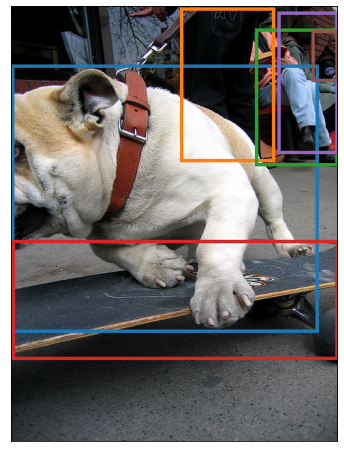

In [96]:
def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), figsize=(8,8),squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

boxes = torch.as_tensor(boxes, dtype=torch.float32)
    
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
colors[:len(anns)]

result = draw_bounding_boxes(T.PILToTensor()(img_raw), boxes, colors=colors, width=5)
show(result)


# (Unfinished) Masking

https://huggingface.co/google/vit-base-patch16-224

https://huggingface.co/docs/datasets/image_process

In [ ]:
from PIL import Image
import requests

In [ ]:
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

# feature_extractor = AutoFeatureExtractor.from_pretrained("facebook/vit-mae-base")
image.size

(640, 480)

In [ ]:
from transformers import AutoFeatureExtractor, ViTMAEConfig, ViTMAEModel, ViTFeatureExtractor

# vit_mae — ViTFeatureExtractor (ViTMAE model)

# AutoFeatureExtractor: This is a generic feature extractor class that will be instantiated as one of the feature extractor classes of the library when created with the AutoFeatureExtractor.from_pretrained() class method.
# Feature Extractor: https://huggingface.co/docs/transformers/main_classes/feature_extractor

In [ ]:
feature_extractor = AutoFeatureExtractor.from_pretrained("facebook/vit-mae-base")
feature_extractor = ViTFeatureExtractor.from_pretrained("facebook/vit-mae-base")
# do_resize = True, size = 224, resample = 2, do_normalize = True, 
# image_mean = None, image_std = None,  **kwargs
print(feature_extractor)

inputs = feature_extractor(images=[img], return_tensors="pt", tensor_type=None)
# return_tensors (str) — The type of Tensor to return. Allowable values are “np”, “pt” and “tf” 
# tensor_type (Union[None, str, TensorType], optional) — You can give a tensor_type here to convert the lists of integers in PyTorch/TensorFlow/Numpy Tensors at initialization.


In [ ]:
inputs['pixel_values'].shape

torch.Size([1, 3, 224, 224])

In [ ]:
model = ViTMAEModel.from_pretrained("facebook/vit-mae-base")

In [ ]:
arr = ["Monday","Tuesday","Wed","Thurs"]
print(*arr)

def food(**kwargs):
    for item in kwargs:
        print(f"{item} is a {kwargs[item]}")
# food(cherry="fruit",cabbage="vegetable",soya="protein")
d = {"cherry":"fruit","cabbage":"vegetable","soya":"protein"}
food(**d)

Monday Tuesday Wed Thurs
cherry is a fruit
cabbage is a vegetable
soya is a protein


In [ ]:
inputs.keys()

dict_keys(['pixel_values'])

In [ ]:
# argument after ** must be a mapping, not Tensor
outputs = model(**inputs)  
# equals to outputs = model(inputs['pixel_values'])

last_hidden_states = outputs.last_hidden_state
# attentions = outputs.attentions
# attentions

In [ ]:
last_hidden_states.shape

torch.Size([1, 50, 768])

https://huggingface.co/docs/transformers/preprocessing#vision

In [ ]:
https://huggingface.co/docs/transformers/preprocessing#feature-extractor